In [615]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

import statsmodels.api as sm

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

#### LOADING THE CSV FILE

In [616]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


UNDERSTANDING ,CLEANING AND VISUALISING THE DATA USING EDA

In [617]:
df.shape

(1460, 81)

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [619]:
#Dropping ID column
df.drop(['Id'],axis=1,inplace=True)

In [620]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [621]:
#Check missing percentage
missing_percentage = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
missing_percentage.head(30)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
MSSubClass       0.000000
Fireplaces       0.000000
Functional       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
dtype: float64

In [622]:
# Since intial few have many missing data's we will drop them as well 
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [623]:
#Check missing percentage
missing_percentage = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
missing_percentage.head(30)

LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
KitchenQual       0.000000
GrLivArea         0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
MSSubClass        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
dtype: float64

In [624]:
#Imputing missing values

In [625]:
#For the categorical columns replacing the values for the missing value with data given in data dictonary
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

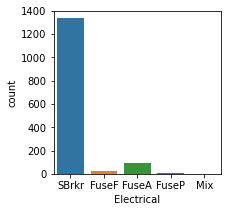

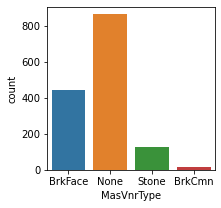

In [626]:
#For the NA where data dictonary have no values substituting the maximum value as the required value
plt.figure(figsize=(3, 3))
sns.countplot(x = 'Electrical', data = df)
plt.figure(figsize=(3, 3))
sns.countplot(x = 'MasVnrType', data = df)

In [627]:
#Based on the graph above we can substitute with missing values with the data arriving maximum 
df['Electrical'] = df['Electrical'].replace(np.nan, 'SBrkr')
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None')

In [628]:
#cross verifying for the missing values
missing_percentage = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
missing_percentage.head(30)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
MSSubClass        0.000000
BedroomAbvGr      0.000000
Fireplaces        0.000000
Functional        0.000000
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
FullBath          0.000000
HalfBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
1stFlrSF          0.000000
GarageType        0.000000
GarageFinish      0.000000
CentralAir        0.000000
GarageCars        0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
dtype: float64

In [629]:
#For the numerical columns filling the values for the missing value median of the columns

In [630]:
#Imputing the missing values with Median 
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) 
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean()) 
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())

In [631]:
#cross verifying for the missing values
missing_percentage = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
missing_percentage.head(30)

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
HeatingQC        0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
dtype: float64

#### EDA & Visualisation

In [632]:
#Checking the skewness with respect to countplot

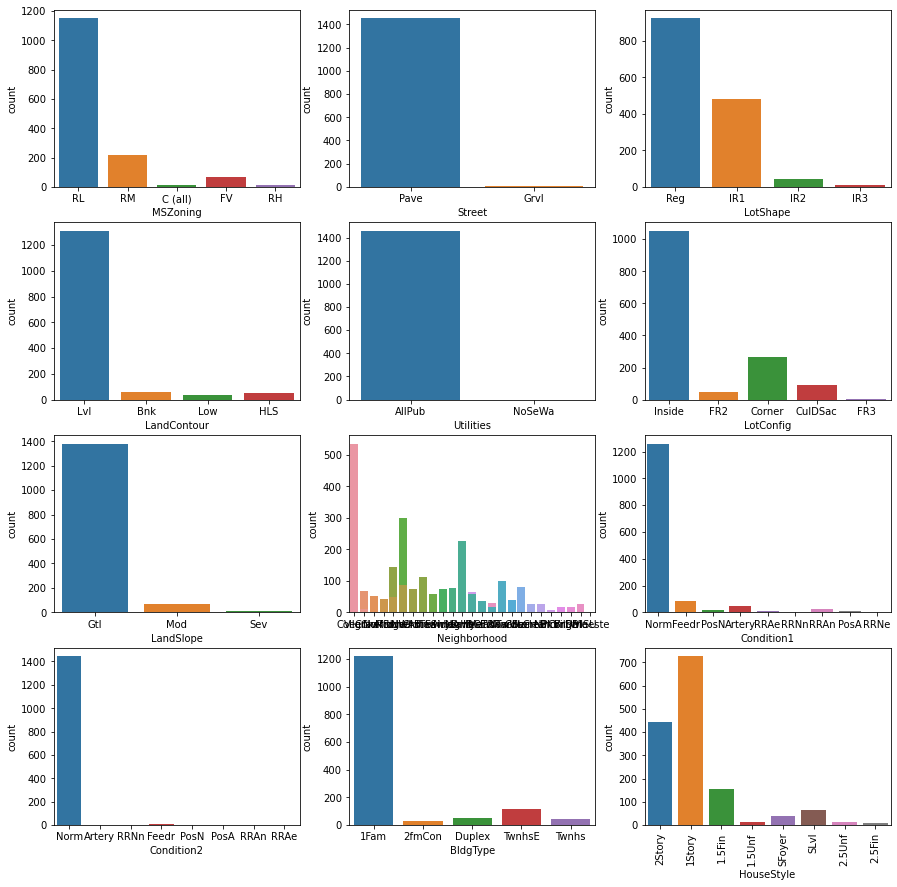

In [633]:
fig, axes = plt.subplots(4, 3,figsize=(15, 15))
sns.countplot(x = 'MSSubClass',  data = df,ax=axes[2,1])
plt.xticks(rotation=90)
sns.countplot(x = 'MSZoning',  data = df,ax=axes[0,0])
sns.countplot(x = 'Street',  data = df,ax=axes[0,1])
sns.countplot(x = 'LotShape',  data = df,ax=axes[0,2])
sns.countplot(x = 'LandContour',  data = df,ax=axes[1,0])
sns.countplot(x = 'Utilities',  data = df,ax=axes[1,1])
sns.countplot(x = 'LotConfig',  data = df,ax=axes[1,2])
sns.countplot(x = 'LandSlope',  data = df,ax=axes[2,0])
sns.countplot(x = 'Neighborhood',  data = df,ax=axes[2,1])
sns.countplot(x = 'Condition1',  data = df,ax=axes[2,2])
sns.countplot(x = 'Condition2',  data = df,ax=axes[3,0])
sns.countplot(x = 'BldgType',  data = df,ax=axes[3,1])
sns.countplot(x = 'HouseStyle',  data = df,ax=axes[3,2])
plt.xticks(rotation=90)
plt.show()

In [634]:
#Checking values of columns that looked skewed
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [635]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [636]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [637]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [638]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [639]:
#Dropping the values which are highly skewed
df.drop(['LandSlope','Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

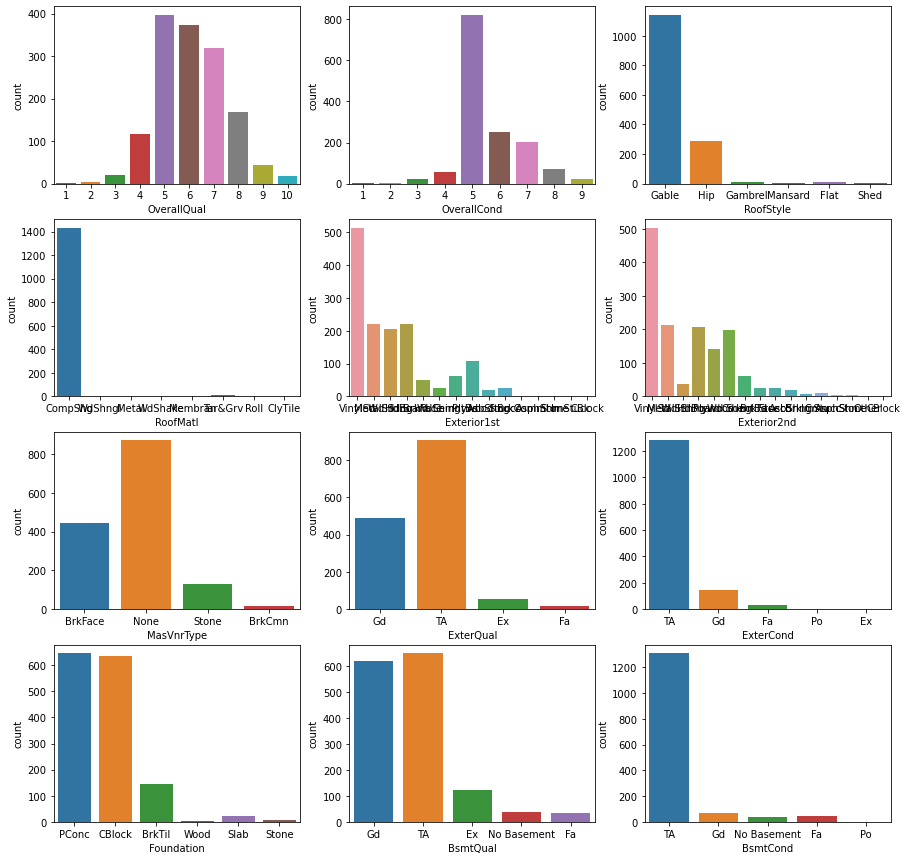

In [640]:
fig, axes = plt.subplots(4, 3,figsize=(15, 15))
sns.countplot(x = 'OverallQual',  data = df,ax=axes[0,0])
sns.countplot(x = 'OverallCond',  data = df,ax=axes[0,1])
sns.countplot(x = 'RoofStyle',  data = df,ax=axes[0,2])
sns.countplot(x = 'RoofMatl',  data = df,ax=axes[1,0])
sns.countplot(x = 'Exterior1st',  data = df,ax=axes[1,1])
sns.countplot(x = 'Exterior2nd',  data = df,ax=axes[1,2])
sns.countplot(x = 'MasVnrType',  data = df,ax=axes[2,0])
sns.countplot(x = 'ExterQual',  data = df,ax=axes[2,1])
sns.countplot(x = 'ExterCond',  data = df,ax=axes[2,2])
sns.countplot(x = 'Foundation',  data = df,ax=axes[3,0])
sns.countplot(x = 'BsmtQual',  data = df,ax=axes[3,1])
sns.countplot(x = 'BsmtCond',  data = df,ax=axes[3,2])
plt.show()

In [641]:
df.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [642]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [643]:
df.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [644]:
df.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [645]:
df.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [646]:
df.drop(['ExterCond','RoofMatl'],axis=1,inplace=True)

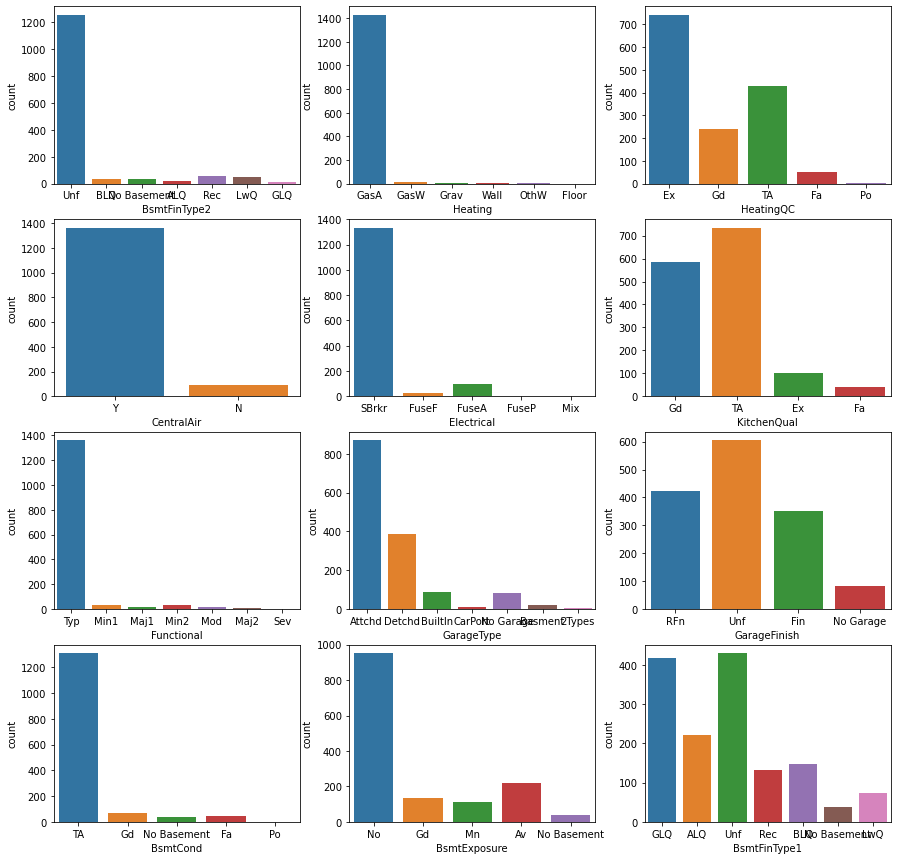

In [647]:
fig, axes = plt.subplots(4, 3,figsize=(15, 15))
sns.countplot(x = 'BsmtFinType2',  data = df,ax=axes[0,0])
sns.countplot(x = 'Heating',  data = df,ax=axes[0,1])
sns.countplot(x = 'HeatingQC',  data = df,ax=axes[0,2])
sns.countplot(x = 'CentralAir',  data = df,ax=axes[1,0])
sns.countplot(x = 'Electrical',  data = df,ax=axes[1,1])
sns.countplot(x = 'KitchenQual',  data = df,ax=axes[1,2])
sns.countplot(x = 'Functional',  data = df,ax=axes[2,0])
sns.countplot(x = 'GarageType',  data = df,ax=axes[2,1])
sns.countplot(x = 'GarageFinish',  data = df,ax=axes[2,2])
sns.countplot(x = 'BsmtCond',  data = df,ax=axes[3,0])
sns.countplot(x = 'BsmtExposure',  data = df,ax=axes[3,1])
sns.countplot(x = 'BsmtFinType1',  data = df,ax=axes[3,2])
plt.show()

In [648]:
df.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [649]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [650]:
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [651]:
df.drop(['Heating','Functional'],axis=1,inplace=True)

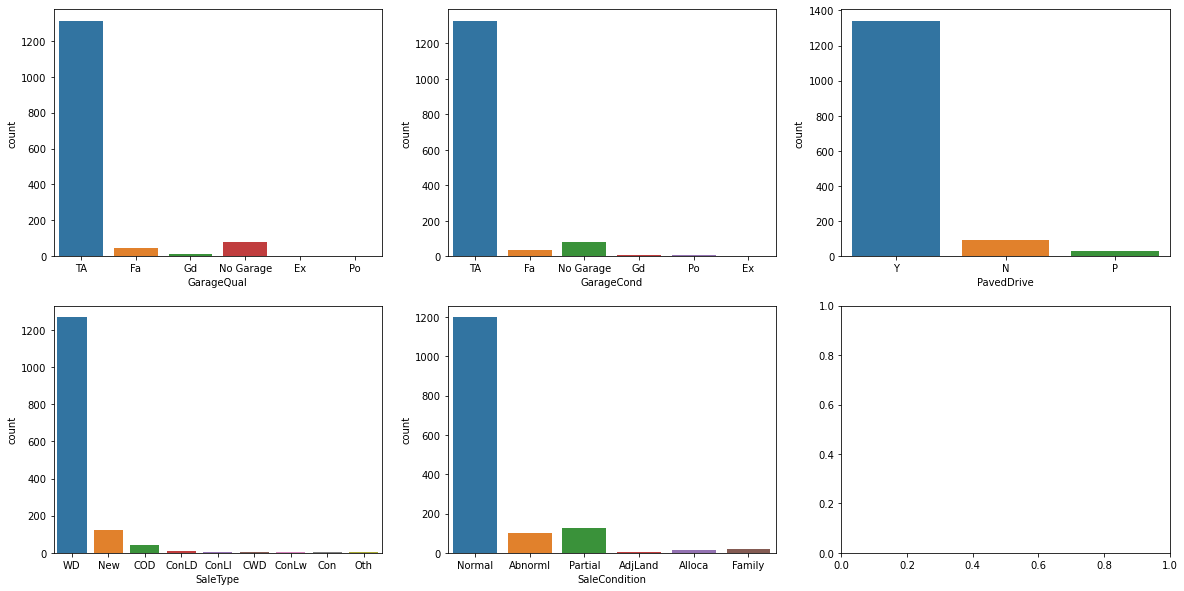

In [652]:
fig, axes = plt.subplots(2, 3,figsize=(20, 10))
sns.countplot(x = 'GarageQual',  data = df,ax=axes[0,0])
sns.countplot(x = 'GarageCond',  data = df,ax=axes[0,1])
sns.countplot(x = 'PavedDrive',  data = df,ax=axes[0,2])
sns.countplot(x = 'SaleType',  data = df,ax=axes[1,0])
sns.countplot(x = 'SaleCondition',  data = df,ax=axes[1,1])
plt.show()

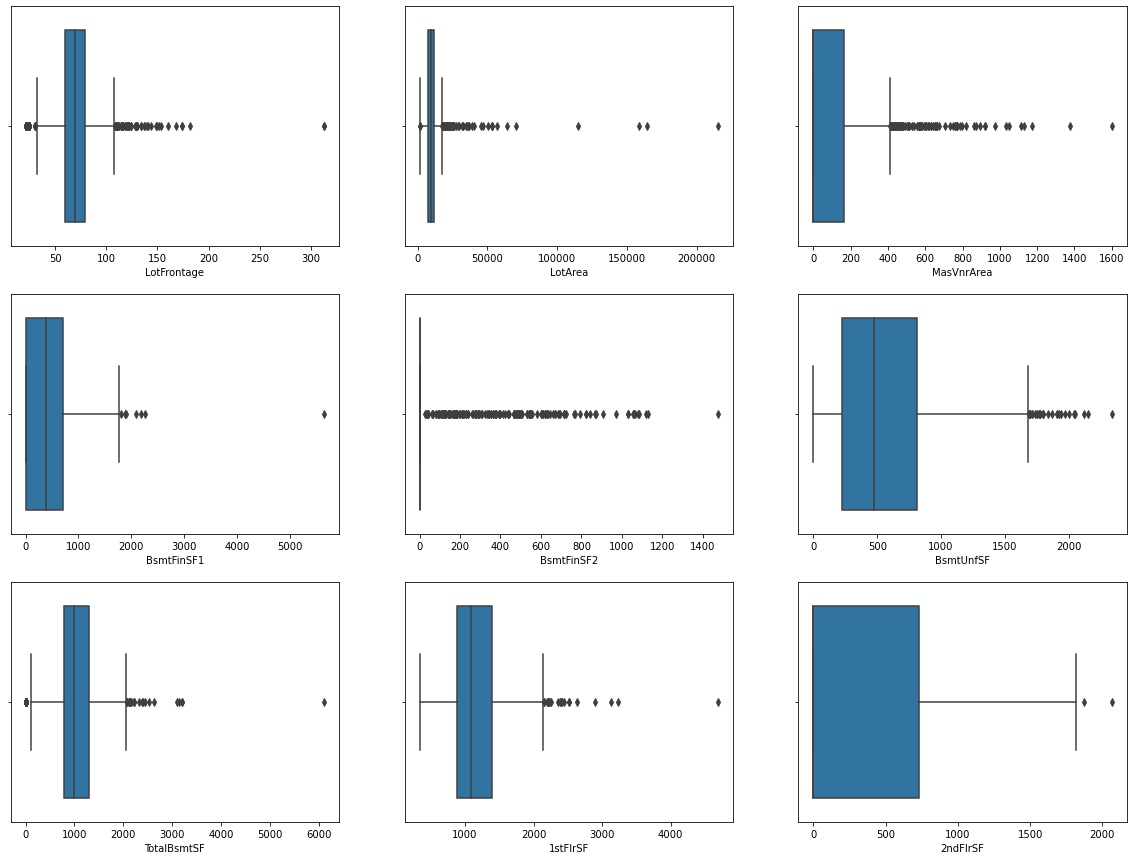

In [653]:
fig, axes = plt.subplots(3, 3,figsize=(20, 15))
sns.boxplot(x = 'LotFrontage',  data = df,ax=axes[0,0])
sns.boxplot(x = 'LotArea',  data = df,ax=axes[0,1])
sns.boxplot(x = 'MasVnrArea',  data = df,ax=axes[0,2])
sns.boxplot(x = 'BsmtFinSF1',  data = df,ax=axes[1,0])
sns.boxplot(x = 'BsmtFinSF2',  data = df,ax=axes[1,1])
sns.boxplot(x = 'BsmtUnfSF',  data = df,ax=axes[1,2])
sns.boxplot(x = 'TotalBsmtSF',  data = df,ax=axes[2,0])
sns.boxplot(x = '1stFlrSF',  data = df,ax=axes[2,1])
sns.boxplot(x = '2ndFlrSF',  data = df,ax=axes[2,2])
plt.show()

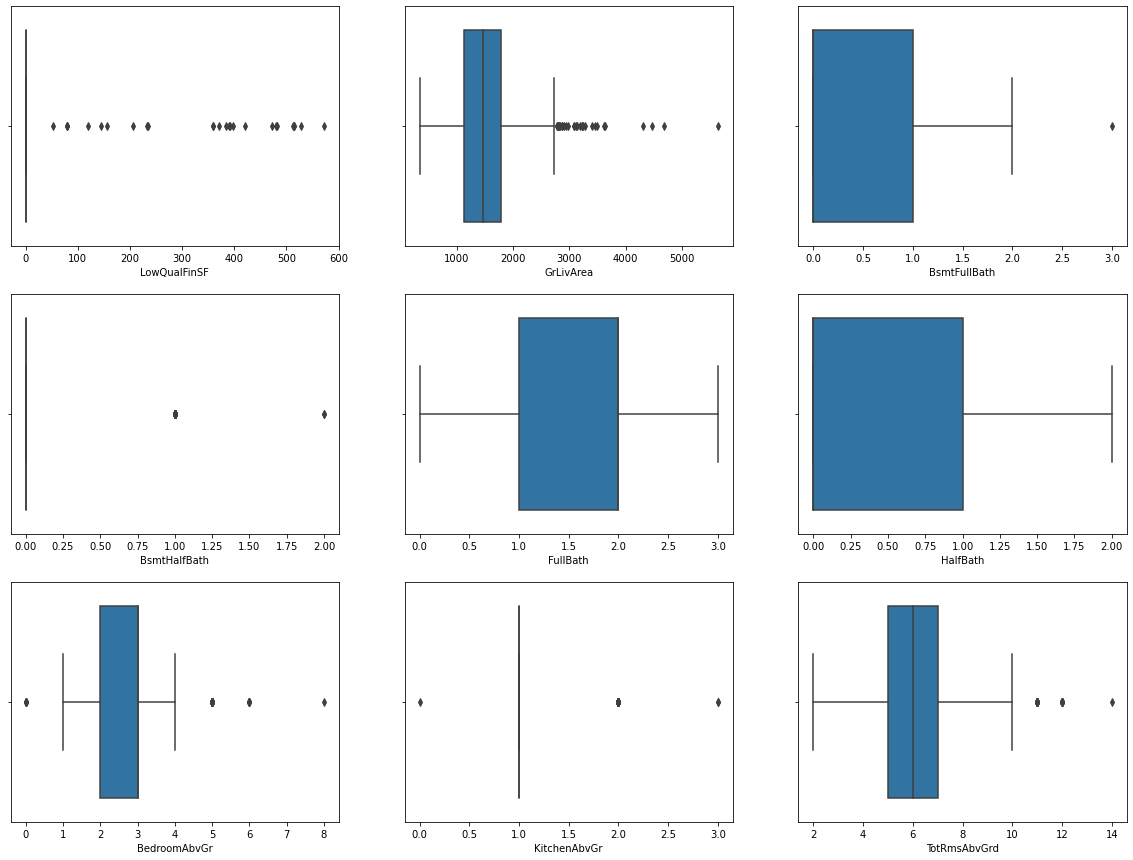

In [654]:
fig, axes = plt.subplots(3, 3,figsize=(20, 15))
sns.boxplot(x = 'LowQualFinSF',  data = df,ax=axes[0,0])
sns.boxplot(x = 'GrLivArea',  data = df,ax=axes[0,1])
sns.boxplot(x = 'BsmtFullBath',  data = df,ax=axes[0,2])
sns.boxplot(x = 'BsmtHalfBath',  data = df,ax=axes[1,0])
sns.boxplot(x = 'FullBath',  data = df,ax=axes[1,1])
sns.boxplot(x = 'HalfBath',  data = df,ax=axes[1,2])
sns.boxplot(x = 'BedroomAbvGr',  data = df,ax=axes[2,0])
sns.boxplot(x = 'KitchenAbvGr',  data = df,ax=axes[2,1])
sns.boxplot(x = 'TotRmsAbvGrd',  data = df,ax=axes[2,2])
plt.show()


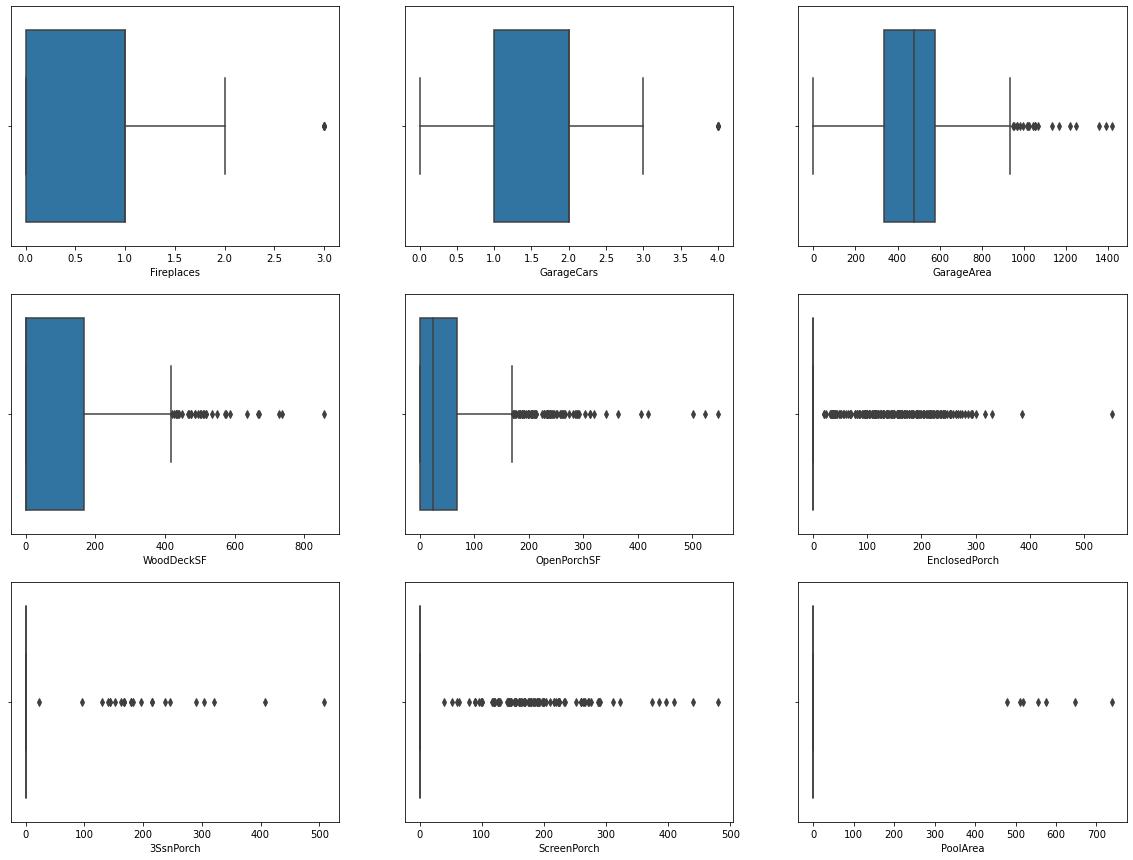

In [655]:
fig, axes = plt.subplots(3, 3,figsize=(20, 15))
sns.boxplot(x = 'Fireplaces',  data = df,ax=axes[0,0])
sns.boxplot(x = 'GarageCars',  data = df,ax=axes[0,1])
sns.boxplot(x = 'GarageArea',  data = df,ax=axes[0,2])
sns.boxplot(x = 'WoodDeckSF',  data = df,ax=axes[1,0])
sns.boxplot(x = 'OpenPorchSF',  data = df,ax=axes[1,1])
sns.boxplot(x = 'EnclosedPorch',  data = df,ax=axes[1,2])
sns.boxplot(x = '3SsnPorch',  data = df,ax=axes[2,0])
sns.boxplot(x = 'ScreenPorch',  data = df,ax=axes[2,1])
sns.boxplot(x = 'PoolArea',  data = df,ax=axes[2,2])
plt.show()

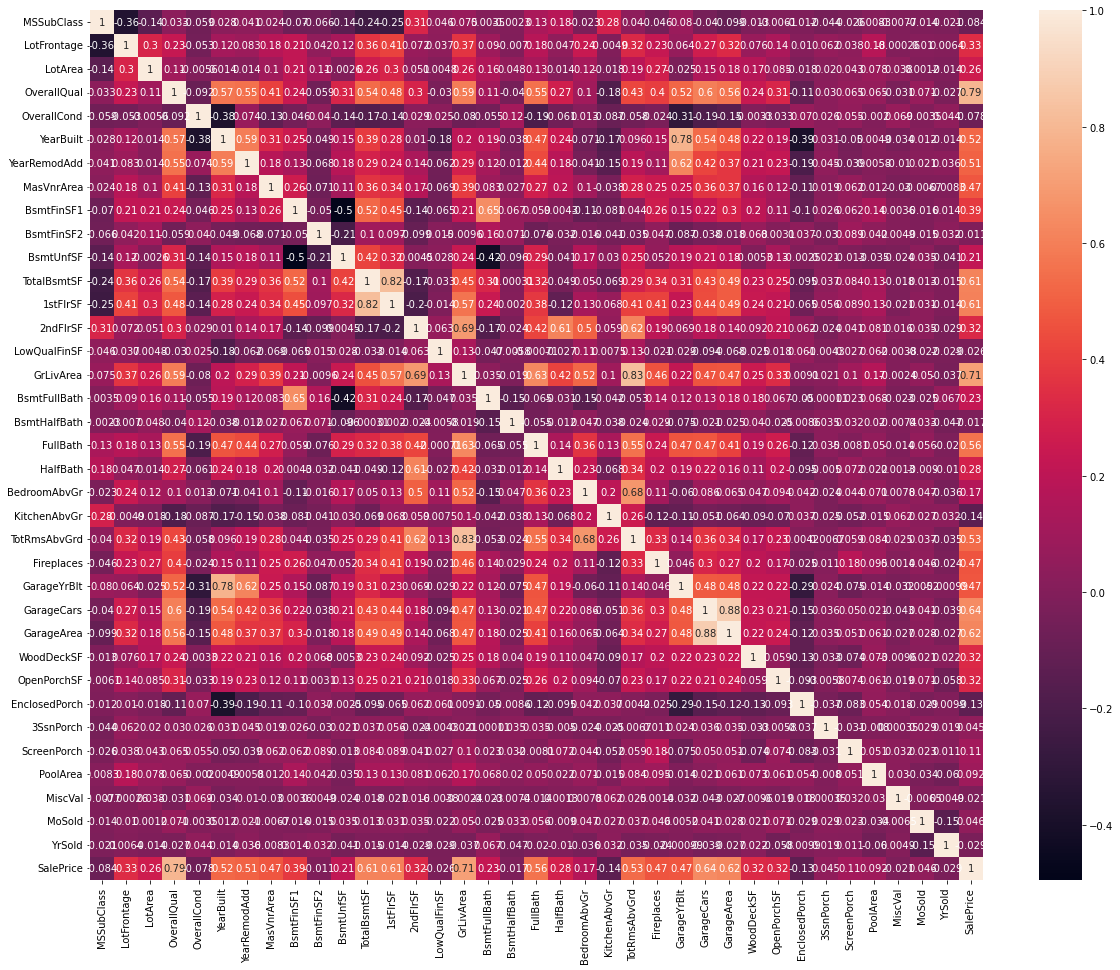

In [656]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [657]:
#Features having high correlation can be dropeed off
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [658]:
#Dropping the fitures 
df.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'],axis=1,inplace=True)

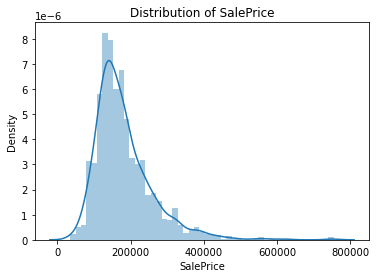

In [659]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(df['SalePrice'])
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

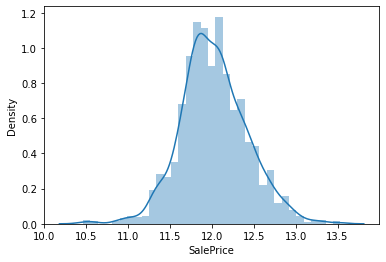

In [660]:
#There is a slight skew in data hence changing to logscale
df['SalePrice']=np.log(df.SalePrice)
sns.distplot(df['SalePrice'])

### Model Building

In [661]:
#Encoding
df.MSSubClass.replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'},inplace=True)
df.OverallQual.replace({ 10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'},inplace=True)
df.OverallCond.replace({ 10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'},inplace=True)

In [662]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [663]:
# Getting Dummy for Categorical Values
cat_dummy = pd.get_dummies(categorical_df,drop_first=True) 
print(cat_dummy.shape)

(1460, 195)


In [664]:
cat_dummy.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [665]:
df = pd.concat([df, cat_dummy], axis=1) 
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,Lvl,FR2,Veenker,1Fam,1Story,...,0,0,0,0,1,0,0,0,1,0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-STORY 1946 & NEWER,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
1456,1-STORY 1946 & NEWER ALL STYLES,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,1Fam,1Story,...,0,0,0,0,1,0,0,0,1,0
1457,2-STORY 1945 & OLDER,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
1458,1-STORY 1946 & NEWER ALL STYLES,RL,68.0,9717,Reg,Lvl,Inside,NAmes,1Fam,1Story,...,0,0,0,0,1,0,0,0,1,0


In [666]:
df.drop(categorical_df,axis=1,inplace=True) 


In [690]:
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True) 

In [691]:
df.shape

(1460, 222)

In [692]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [693]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [694]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 221)
X_test Shape: (438, 221)
y_train Shape: (1021,)
y_test Shape: (438,)


In [695]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.787597,-0.124502,-1.228053,...,0,0,0,0,1,0,0,0,1,0
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,2.140556,-0.124502,2.123103,...,0,0,0,0,1,0,0,0,1,0
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,0.795996,-0.124502,-0.056465,...,0,0,0,0,1,0,0,0,1,0
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,0.669584,-0.124502,0.221858,...,0,0,0,0,1,0,0,0,1,0
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,1.611926,-0.124502,1.453624,...,0,0,0,0,1,0,0,0,1,0


In [696]:
#Transforming X test without fitting
X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.transform(X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']])


In [697]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.432493,-0.144189,-0.558025,0.361992,-0.293313,-0.704396,-0.430911,-0.787597,-0.124502,-1.228053,...,0,0,0,0,1,0,0,0,1,0
57,0.881585,0.112505,-0.558025,-0.963574,-0.293313,0.660317,-0.439628,1.189021,-0.124502,0.381706,...,0,0,0,0,1,0,0,0,1,0
780,-0.296554,-0.253368,-0.355087,-0.963574,-0.293313,1.500998,0.381881,-0.787597,-0.124502,-0.496515,...,0,0,0,0,1,0,0,0,1,0
382,0.428455,-0.120412,-0.558025,-0.963574,-0.293313,0.836481,-0.267481,1.184425,-0.124502,0.526509,...,0,0,0,0,1,0,0,0,1,0
1170,0.292515,-0.058786,-0.558025,0.159714,-0.293313,0.022559,0.074633,-0.787597,-0.124502,-0.750391,...,0,0,0,0,1,0,0,0,1,0


### Ridge Regression

In [698]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()
#Cross Validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [699]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.071541,-0.104071
1,{'alpha': 0.001},-0.071545,-0.104033
2,{'alpha': 0.01},-0.071581,-0.103712
3,{'alpha': 0.05},-0.071691,-0.102799
4,{'alpha': 0.1},-0.071800,-0.102023
5,{'alpha': 0.2},-0.071985,-0.100851
6,{'alpha': 0.3},-0.072150,-0.100089
7,{'alpha': 0.4},-0.072314,-0.099477
8,{'alpha': 0.5},-0.072470,-0.099012
9,{'alpha': 0.6},-0.072609,-0.098630


In [700]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

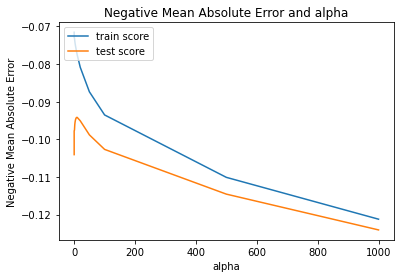

In [701]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [702]:
model_cv.best_params_

{'alpha': 9.0}

In [746]:
alpha = 9
ridge=Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.04794417e-02  1.54732141e-02  9.56155724e-04  3.08938698e-04
  1.06614734e-02  1.05732818e-02  1.46121914e-02  2.35778869e-02
 -4.43927359e-03  1.04991579e-01  2.58356862e-02  5.37932458e-03
  3.38147665e-02  1.99759372e-02  9.98438942e-03 -2.54133956e-02
  2.18043363e-02  4.84963126e-02  1.25550998e-02 -1.02419041e-03
  4.73609751e-03  7.43812722e-03  1.07811954e-02 -1.29082566e-02
  3.59322255e-04  1.35473859e-04 -1.48822544e-03 -7.72703243e-02
  4.57382022e-02  6.74670091e-03 -1.26532909e-02 -4.29152197e-03
  3.47851384e-02  4.14102830e-02 -1.46364079e-02 -4.79450664e-02
  2.65558548e-02 -3.23062949e-02  2.43558042e-02  1.23653347e-02
  6.92228295e-02  6.29979708e-02  6.32393221e-02  1.73586658e-02
  2.41241837e-02 -3.78482314e-02  8.20918247e-03  3.84104829e-02
  4.06226457e-02  4.70128811e-02  3.63063545e-02 -4.02737771e-02
 -1.22522936e-02 -5.46390978e-03 -5.14656226e-03 -1.17012822e-02
  9.84493727e-03  4.78230870e-02 -1.58228708e-03  8.99736494e-02
 -8.70209684e-02 -5.94180

In [747]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

r2_train_ridge=r2_score(y_train,y_pred_train_ridge)
print('R2 (Train): ')
print(r2_train_ridge)

r2_test_ridge=r2_score(y_test,y_pred_test_ridge)
print('R2 (Test): ')
print(r2_test_ridge)

rss1_ridge=np.sum(np.square(y_train-y_pred_train_ridge))
print('RSS (Train): ')
print(rss1_ridge)

rss2_ridge=np.sum(np.square(y_test-y_pred_test_ridge))
print('RSS (Test): ')
print(rss2_ridge)

mse_train_ridge=mean_squared_error(y_train, y_pred_train_ridge)
print('MSE (Train): ')
print(mse_train_ridge)

mse_test_ridge=mean_squared_error(y_test, y_pred_test_ridge)
print('MSE (Test): ')
print(mse_test_ridge)

R2 (Train): 
0.9160123712761087
R2 (Test): 
0.8754341796238762
RSS (Train): 
13.479362859306306
RSS (Test): 
8.977280674841435
MSE (Train): 
0.013202118373463571
MSE (Test): 
0.0204960746000946


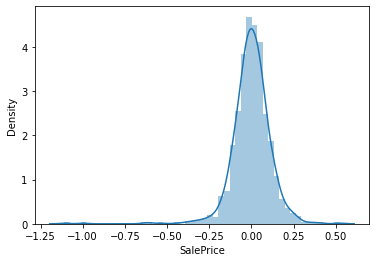

In [727]:
#Error Distrubution-Train(Ridge)
sns.distplot((y_train-y_pred_train_ridge))
plt.show()

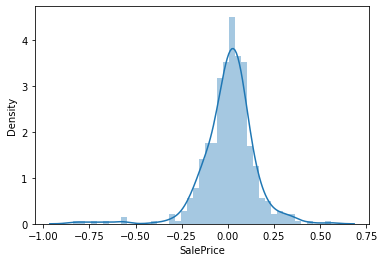

In [728]:
#Error DistrubutioN-Test(Ridge)
sns.distplot((y_test-y_pred_test_ridge))
plt.show()

### Lasso Regression

In [729]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [730]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.072722,-0.096605
1,{'alpha': 0.001},-0.081430,-0.095444
2,{'alpha': 0.01},-0.113569,-0.117992
3,{'alpha': 0.05},-0.153274,-0.154610
4,{'alpha': 0.1},-0.186463,-0.187486
5,{'alpha': 0.2},-0.260416,-0.261151
6,{'alpha': 0.3},-0.310053,-0.310647
7,{'alpha': 0.4},-0.310053,-0.310647
8,{'alpha': 0.5},-0.310053,-0.310647
9,{'alpha': 0.6},-0.310053,-0.310647


In [731]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

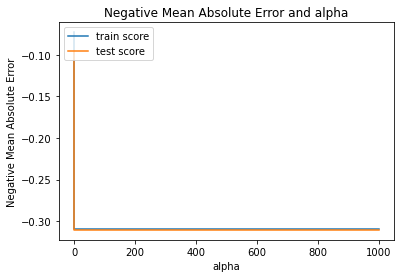

In [732]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [733]:
model_cv.best_params_

{'alpha': 0.001}

In [734]:
alpha = 0.001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.00743462  0.01265166  0.00132718 -0.          0.00437248  0.00672326
  0.02149141  0.         -0.00724831  0.12156915  0.02799156  0.00618367
  0.03489105  0.01954999  0.00557709 -0.023269    0.02136644  0.05132597
  0.01251383 -0.          0.0029607   0.00604405  0.01026728 -0.01419471
  0.          0.0002969  -0.00218625 -0.0891301   0.04469013  0.
 -0.         -0.          0.          0.         -0.         -0.04109089
  0.         -0.          0.          0.          0.02235487  0.00032769
  0.03993088 -0.          0.         -0.          0.          0.
  0.          0.01839611  0.03832444 -0.         -0.         -0.
 -0.         -0.          0.          0.02863146  0.          0.1002832
 -0.0782285  -0.         -0.06727884 -0.04758667  0.         -0.010232
 -0.         -0.          0.04212123  0.10027037 -0.04776839 -0.
 -0.02168078  0.          0.09066378  0.00974115  0.          0.
 -0.          0.         -0.04450143 -0.          0.          0.
  0.          0.         -0.0

In [735]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)


r2_train_lasso=r2_score(y_train,y_pred_train_lasso)
print('R2 (Train): ')
print(r2_train_lasso)

r2_test_lasso=r2_score(y_test,y_pred_test_lasso)
print('R2 (Test): ')
print(r2_test_lasso)

rss1_lasso=np.sum(np.square(y_train-y_pred_train_lasso))
print('RSS (Train): ')
print(rss1_lasso)

rss2_lasso=np.sum(np.square(y_test-y_pred_test_lasso))
print('RSS (Test): ')
print(rss2_lasso)

mse_train_lasso=mean_squared_error(y_train, y_pred_train_lasso)
print('MSE (Train): ')
print(mse_train_lasso)

mse_test_lasso=mean_squared_error(y_test, y_pred_test_lasso)
print('MSE (Test): ')
print(mse_test_lasso)

R2 (Train): 
0.9010096763389022
R2 (Test): 
0.8689168112713126
RSS (Train): 
15.887179010312336
RSS (Test): 
9.446978098947241
MSE (Train): 
0.015560410392078684
MSE (Test): 
0.021568443148281373


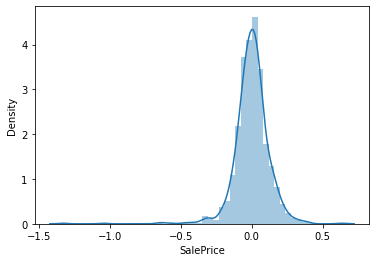

In [736]:
#Eror Distrubution-Train(Lasso)
sns.distplot((y_train-y_pred_train_lasso))
plt.show()

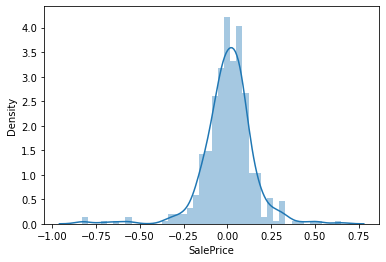

In [737]:
#Error Distrubution-Test(Lasso)
sns.distplot((y_test-y_pred_test_lasso))
plt.show()

In [738]:
betas= pd.DataFrame(index=X.columns)
betas.row=X.columns
betas['Ridge']=ridge.coef_
betas['lasso']=lasso.coef_
pd.set_option('display.max_rows',None)
betas.sort_values(by=['Ridge'])

,Ridge,lasso
OverallCond_Fair,-0.130902,-0.192670
Neighborhood_Edwards,-0.087021,-0.078229
OverallQual_Poor,-0.080513,-0.000000
MSSubClass_1-STORY 1945 & OLDER,-0.077270,-0.089130
Neighborhood_IDOTRR,-0.071615,-0.067279
KitchenQual_Fa,-0.069203,-0.040073
Neighborhood_MeadowV,-0.065673,-0.047587
KitchenQual_TA,-0.064434,-0.033357
ExterQual_Fa,-0.063423,-0.033866
BsmtQual_TA,-0.062823,-0.017578


In [739]:
betas.sort_values(by=['lasso'])

,Ridge,lasso
OverallCond_Fair,-0.130902,-0.192670
MSSubClass_1-STORY 1945 & OLDER,-0.077270,-0.089130
Neighborhood_Edwards,-0.087021,-0.078229
Neighborhood_IDOTRR,-0.071615,-0.067279
OverallQual_Below Average,-0.059284,-0.056966
Neighborhood_OldTown,-0.052751,-0.047768
Neighborhood_MeadowV,-0.065673,-0.047587
OverallCond_Below Average,-0.049625,-0.047192
BldgType_Twnhs,-0.056429,-0.044501
MSSubClass_2-STORY PUD - 1946 & NEWER,-0.047945,-0.041091


#### Conclusion : For Housing Prediction through Ridge and lasso regression we found that the r2_score of ridge is slightly higher than lasso for the test dataset so we will choose ridge regression to solve this problem
